In [6]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
#Load Dataset
data=pd.read_csv('D:/C_Drive_Desktop/Data_Analytics_For_Business_Decision_Making/2nd_Semester/2nd_Semester/2206_Capstone_Project/Final_Dataset/Obesity_data_Smote.csv')
data.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,0,173.58,71.98,23.89,4,0
1,69,0,164.13,89.96,33.40,2,1
2,46,1,168.07,72.93,25.82,4,0
3,32,0,168.46,84.89,29.91,3,0
4,60,0,183.57,69.04,20.49,3,0


In [8]:
data.dtypes

Age                        int64
Gender                     int64
Height                   float64
Weight                   float64
BMI                      float64
PhysicalActivityLevel      int64
ObesityCategory            int64
dtype: object

##### 5 Number Summary

In [9]:
#Show Key Statistics
data.describe()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
count,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000
mean,49.818294,0.378863,167.240520,77.809647,28.166218,2.405439,0.500000
std,18.121090,0.485254,10.147260,15.834080,6.663567,1.045659,0.500155
min,18.000000,0.000000,136.120000,26.070000,8.470000,1.000000,0.000000
25%,35.000000,0.000000,160.715341,67.842500,23.292500,2.000000,0.000000
50%,50.000000,0.000000,166.780440,79.097140,29.995000,2.000000,0.500000
75%,66.000000,1.000000,173.772500,89.864469,32.720574,3.000000,1.000000
max,79.000000,1.000000,201.420000,118.910000,50.790000,4.000000,1.000000


Class Split
0    809
1    809
Name: ObesityCategory, dtype: int64


Text(0, 0.5, 'Count')

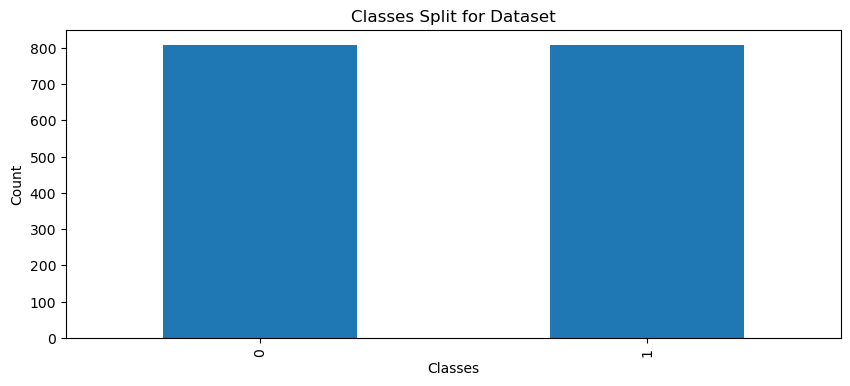

In [10]:
#Class Balance
print('Class Split')
print(data['ObesityCategory'].value_counts())
data['ObesityCategory'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

#### Based on Assumption1 of LDA and QDA, checking if Independent Variables (A,P,C,LK,WK,LKG,A_Coef) are normally distributed

In [11]:
#Normality test - Shapiro-Wilk Test

#    p <= alpha(0.05): reject H0, not normal.
#   p > alpha(0.05): fail to reject H0, normal.

from scipy.stats import shapiro
stat, p = shapiro(data['Age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
stat, p = shapiro(data['Height'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
stat, p = shapiro(data['Weight'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
stat, p = shapiro(data['BMI'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    

Statistics=0.954, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.997, p=0.004
Sample does not look Gaussian (reject H0)
Statistics=0.985, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.982, p=0.000
Sample does not look Gaussian (reject H0)


##### Result: It can be seen that data in neither Independent Variable is Normally Distributed

##### Assumption 2 : Columns must have same Variance

In [16]:
print('Variance of Age : ',data.Age.var())
print('Variance of Height : ',data.Height.var())
print('Variance of Weight : ',data.Weight.var())
print('Variance of BMI : ',data.BMI.var())
print('Variance of Gender : ',data.Gender.var())
print('Variance of PhysicalActivityLevel : ',data.PhysicalActivityLevel.var())
print('Variance of ObesityCategory : ',data.ObesityCategory.var())

Variance of Age :  328.37388898699123
Variance of Height :  102.96688468023149
Variance of Weight :  250.7180736793032
Variance of BMI :  44.40312474961946
Variance of Gender :  0.23547130954865592
Variance of PhysicalActivityLevel :  1.0934026830195098
Variance of ObesityCategory :  0.2501546072974644


##### Result: It can be seen that Variance in the Columns are not equal

#### Assumption 3 : Variables should have equal Covariances

In [17]:
#Covariance test - Levene Test

#   p <= alpha(0.05): reject H0, not the same covariance.
#   p > alpha(0.05): fail to reject H0, same covariance.

import scipy.stats as stats
names=data.get('ObesityCategory')

cnt=1
for col in data.columns:
    if (col=='ObesityCategory'):
        continue
        
    stat, p = stats.levene(data[col][data['ObesityCategory'] == names[0]], 
               data[col][data['ObesityCategory'] == names[1]])

    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Covariance the Same (fail to reject H0)')
        print('\n')
    else:
        print('Covariance different(reject H0)')
        print('\n')
    cnt +=1    

Age
Statistics=0.306, p=0.580
Covariance the Same (fail to reject H0)


Gender
Statistics=67.352, p=0.000
Covariance different(reject H0)


Height
Statistics=24.167, p=0.000
Covariance different(reject H0)


Weight
Statistics=80.475, p=0.000
Covariance different(reject H0)


BMI
Statistics=124.997, p=0.000
Covariance different(reject H0)


PhysicalActivityLevel
Statistics=51.251, p=0.000
Covariance different(reject H0)




##### Result: It can be seen that data in Independent Variable does not equal Covariance

In [18]:
#Create x and y variables
x = dataset.drop('ObesityCategory', axis=1).to_numpy()
Y = dataset['ObesityCategory'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.transform(x_test)

#Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [19]:
#Class Balance - Test Data
print('Train Data - Class Split')
num_zeros = (y_train_smt == 0).sum()
num_ones = (y_train_smt == 1).sum()
print('Class 0 -',  num_zeros)
print('Class 1 -',  num_ones)

Train Data - Class Split
Class 0 - 647
Class 1 - 647


In [20]:
#Base LDA, QDA and Logistical Regression Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('LDA', LinearDiscriminantAnalysis()),('QDA',QuadraticDiscriminantAnalysis()),
                   ('LogReg',LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',
                                               random_state=100))]: 
    method.fit(x_train2,y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))         


Estimator: LDA
[[147  15]
 [  0 162]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       162
           1       0.92      1.00      0.96       162

    accuracy                           0.95       324
   macro avg       0.96      0.95      0.95       324
weighted avg       0.96      0.95      0.95       324


Estimator: QDA
[[146  16]
 [  4 158]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       162
           1       0.91      0.98      0.94       162

    accuracy                           0.94       324
   macro avg       0.94      0.94      0.94       324
weighted avg       0.94      0.94      0.94       324


Estimator: LogReg
[[157   5]
 [  0 162]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       162
           1       0.97      1.00      0.98       162

    accuracy                           0.98       324
   macro

In [21]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lda = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearDiscriminantAnalysis())])
pipeline.insert(0,pipe_lda)

pipe_qda = Pipeline([('scl', StandardScaler()),
                    ('clf', QuadraticDiscriminantAnalysis())])
pipeline.insert(1,pipe_qda)

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',
                                               random_state=100))])   
pipeline.insert(2,pipe_logreg)
    
    
# Set grid search params 

modelpara =[]

param_gridlda = {'clf__solver':['svd','lsqr','eigen']}
modelpara.insert(0,param_gridlda)

param_gridqda = {}
modelpara.insert(1,param_gridqda)

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2']}
modelpara.insert(2,param_gridlogreg)

In [22]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train_smt, 
                                                            y=y_train_smt,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.0])
    plt.show()

LDA Learning Curve


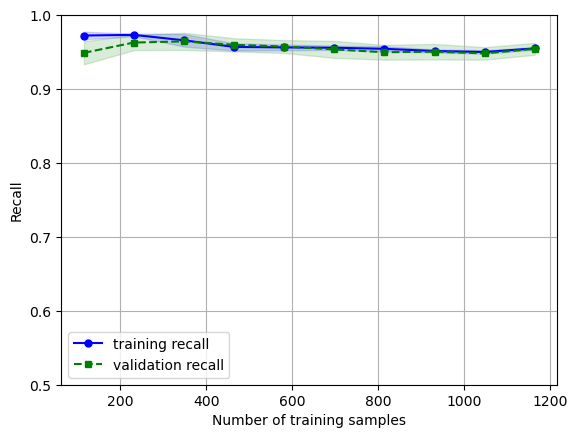


 QDA Learning Curve


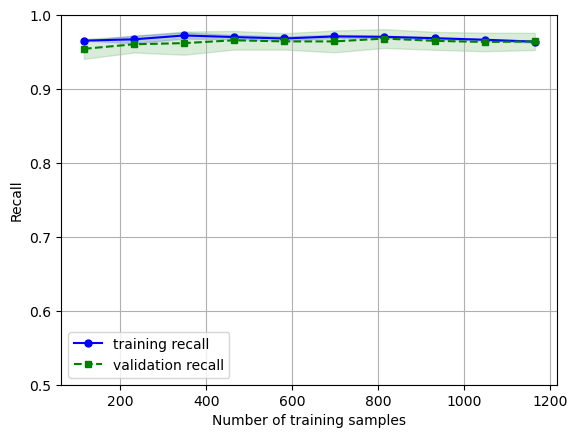


 Logistic Regression Learning Curve


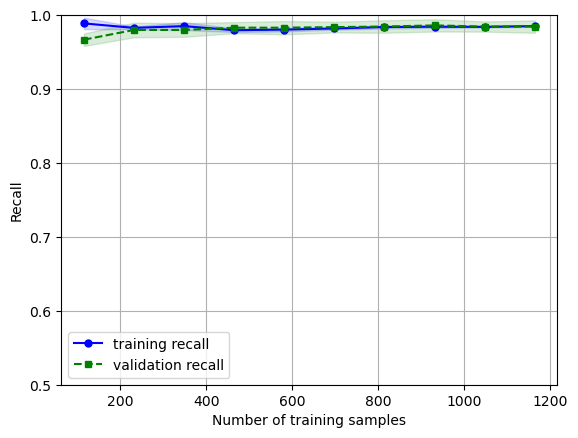

In [23]:
#Plot Learning Curve
print('LDA Learning Curve')
plot_learning_curves(pipe_lda)
print('\n QDA Learning Curve')
plot_learning_curves(pipe_qda)
print('\n Logistic Regression Learning Curve')
plot_learning_curves(pipe_logreg)

Model Evaluation - Recall Score
LDA 0.95 +/- 0.02
QDA 0.96 +/- 0.01
Log Reg 0.98 +/- 0.01




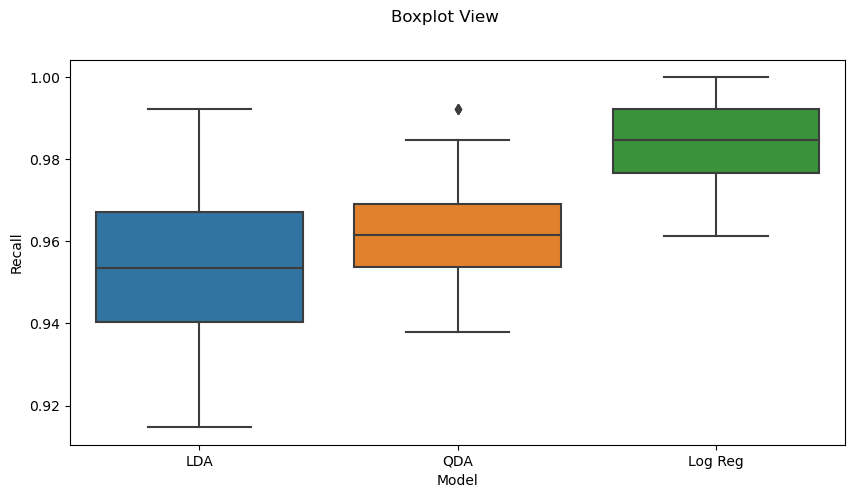

In [24]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LDA',pipe_lda))
models.append(('QDA',pipe_qda))
models.append(('Log Reg',pipe_logreg))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x_train_smt,y_train_smt,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n') 

fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

In [25]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train_smt, y_train_smt)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Validation Statistics
    target_names=['0','1']
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
        
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   


Optimized Model

Model Name: LinearDiscriminantAnalysis()

Best Parameters: {'clf__solver': 'svd'}

 [[147  15]
 [  0 162]]

               precision    recall  f1-score   support

           0       1.00      0.91      0.95       162
           1       0.92      1.00      0.96       162

    accuracy                           0.95       324
   macro avg       0.96      0.95      0.95       324
weighted avg       0.96      0.95      0.95       324

ROC Curve


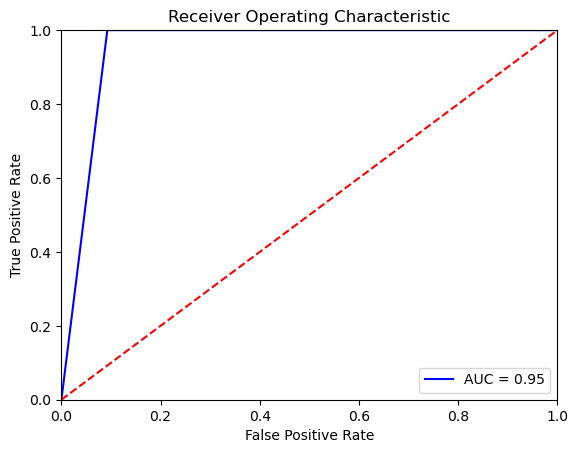


Optimized Model

Model Name: QuadraticDiscriminantAnalysis()

Best Parameters: {}

 [[146  16]
 [  4 158]]

               precision    recall  f1-score   support

           0       0.97      0.90      0.94       162
           1       0.91      0.98      0.94       162

    accuracy                           0.94       324
   macro avg       0.94      0.94      0.94       324
weighted avg       0.94      0.94      0.94       324

ROC Curve


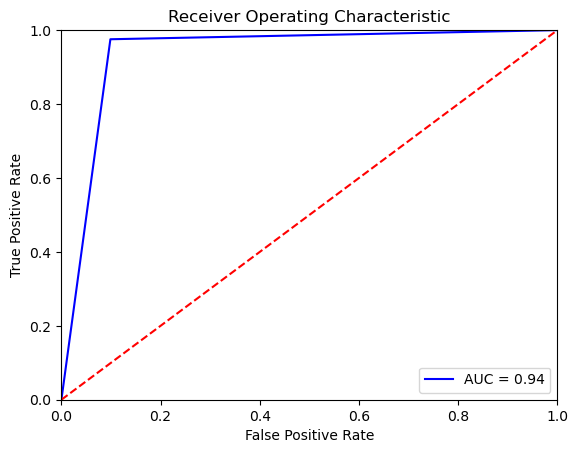


Optimized Model

Model Name: LogisticRegression(class_weight='balanced', random_state=100)

Best Parameters: {'clf__C': 100, 'clf__penalty': 'l2'}

 [[160   2]
 [  0 162]]

               precision    recall  f1-score   support

           0       1.00      0.99      0.99       162
           1       0.99      1.00      0.99       162

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324

ROC Curve


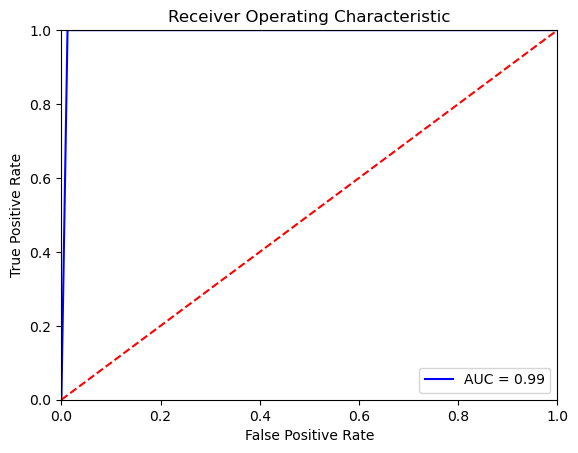

In [26]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)